In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from datetime import datetime
# Set display options to show all columns
pd.set_option('display.max_columns', None)
from sklearn.calibration import LabelEncoder

df = pd.read_csv('../DataOut/bus_stop_times_feature_added_all_moddedDF.csv')
pivot_df =pd.read_csv('../DataOut/Clusters/TScluster_cluster_percentages.csv')

pivot_df1 = pd.read_csv('../DataOut/Clusters/norm_cluster_cluster_percentages.csv')
pivot_df2 = pd.read_csv('../DataOut/Clusters/TScluster_PCA_cluster_percentages.csv')
pivot_df3 = pd.read_csv('../DataOut/Clusters/TScluster_DTW_cluster_percentages.csv')
pivot_df4 = pd.read_csv('../DataOut/Clusters/TScluster_cluster_percentages.csv')
pivot_df5 =pd.read_csv('../DataOut/Clusters/TScluster_SDTW_cluster_percentages.csv')
pivot_df6 = pd.read_csv('../DataOut/Clusters/Normcluster_new_cluster_percentages.csv')

pivot_dfs=[[pivot_df1,'NormCluster'],[pivot_df2,'TSclusters km pca'],[pivot_df3,'TSclusters withdtw'],[pivot_df4,'TSclusters no dtw'],[pivot_df5,'TScluster_SDTW'],[pivot_df6,'NormCluster_new']]

In [2]:
df

,trip_id,deviceid,direction,bus_stop,date,arrival_time,departure_time,dwell_time,dwell_time_in_seconds_old,day_of_week,time_of_day,Sunday/holiday,saturday,weekday/end,week_no,dt(w-1),dt(w-2),dt(w-3),dt(t-1),dt(t-2),dt(n-1),dt(n-2),dt(n-3),hour_of_day,day,month,temp,precip,windspeed,conditions,rt(n-1),stop_type,dwell_time_in_seconds
0,4890.0,262,1,101,2021-10-01,06:40:58,06:42:12,0:01:14,74.0,4,6.50,0,0,1,1,92.0,92.0,92.0,92.0,92.0,92.0,92.0,92.0,6,1,10,20.0,0.0,6.1,Partially cloudy,69.0,pro,74.0
1,4890.0,262,1,102,2021-10-01,06:45:42,06:45:42,0:00:00,0.0,4,6.75,0,0,1,1,45.0,45.0,45.0,45.0,45.0,74.0,45.0,45.0,6,1,10,20.0,0.0,6.1,Partially cloudy,210.0,mod,0.0
2,4890.0,262,1,103,2021-10-01,06:53:58,06:54:04,0:00:06,6.0,4,6.75,0,0,1,1,28.0,28.0,28.0,28.0,28.0,0.0,74.0,28.0,6,1,10,20.0,0.0,6.1,Partially cloudy,496.0,mod,6.0
3,4890.0,262,1,104,2021-10-01,06:57:19,06:57:19,0:00:00,0.0,4,6.75,0,0,1,1,1.0,1.0,1.0,1.0,1.0,6.0,0.0,74.0,6,1,10,20.0,0.0,6.1,Partially cloudy,195.0,br,0.0
4,4890.0,262,1,105,2021-10-01,06:58:56,07:02:27,0:03:31,211.0,4,6.75,0,0,1,1,230.0,230.0,230.0,230.0,230.0,0.0,6.0,0.0,6,1,10,20.0,0.0,6.1,Partially cloudy,97.0,pro,211.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75125,11208.0,513,1,110,2022-10-31,18:38:31,18:38:46,0:00:15,15.0,0,18.50,0,0,1,42,18.0,15.0,18.0,38.0,15.0,15.0,15.0,15.0,18,31,10,22.2,0.0,4.3,Partially cloudy,191.0,mod,15.0
75126,11208.0,513,1,111,2022-10-31,18:41:11,18:41:11,0:00:00,0.0,0,18.50,0,0,1,42,7.0,15.0,7.0,12.0,9.0,15.0,15.0,15.0,18,31,10,22.2,0.0,4.3,Partially cloudy,145.0,br,0.0
75127,11208.0,513,1,112,2022-10-31,18:43:37,18:43:44,0:00:07,7.0,0,18.50,0,0,1,42,7.0,12.0,7.0,0.0,2.0,0.0,15.0,15.0,18,31,10,22.2,0.0,4.3,Partially cloudy,146.0,br,7.0
75128,11208.0,513,1,113,2022-10-31,18:46:13,18:46:28,0:00:15,15.0,0,18.75,0,0,1,42,7.0,7.0,7.0,17.0,46.0,7.0,0.0,15.0,18,31,10,22.2,0.0,4.3,Partially cloudy,149.0,mod,15.0


In [3]:
# drop raws after 	'2022-11-01' from df
df = df[df['date']<='2022-11-01']

In [4]:
# show all the columns in pandas dataframes
pd.set_option('display.max_columns', None)

In [5]:
pivot_dfs[4][0]

,deviceid,Cluster_1.0,Cluster_3.0,Cluster_0.0,Cluster_2.0
0,116,55,44,1.0,0.0
1,117,17,41,9.0,33.0
2,121,26,41,15.0,18.0
3,123,27,36,15.0,23.0
4,128,36,29,12.0,23.0
5,209,25,25,0.0,50.0
6,250,26,32,13.0,29.0
7,262,23,39,13.0,24.0


In [6]:
df

,trip_id,deviceid,direction,bus_stop,date,arrival_time,departure_time,dwell_time,dwell_time_in_seconds_old,day_of_week,time_of_day,Sunday/holiday,saturday,weekday/end,week_no,dt(w-1),dt(w-2),dt(w-3),dt(t-1),dt(t-2),dt(n-1),dt(n-2),dt(n-3),hour_of_day,day,month,temp,precip,windspeed,conditions,rt(n-1),stop_type,dwell_time_in_seconds
0,4890.0,262,1,101,2021-10-01,06:40:58,06:42:12,0:01:14,74.0,4,6.50,0,0,1,1,92.0,92.0,92.0,92.0,92.0,92.0,92.0,92.0,6,1,10,20.0,0.0,6.1,Partially cloudy,69.0,pro,74.0
1,4890.0,262,1,102,2021-10-01,06:45:42,06:45:42,0:00:00,0.0,4,6.75,0,0,1,1,45.0,45.0,45.0,45.0,45.0,74.0,45.0,45.0,6,1,10,20.0,0.0,6.1,Partially cloudy,210.0,mod,0.0
2,4890.0,262,1,103,2021-10-01,06:53:58,06:54:04,0:00:06,6.0,4,6.75,0,0,1,1,28.0,28.0,28.0,28.0,28.0,0.0,74.0,28.0,6,1,10,20.0,0.0,6.1,Partially cloudy,496.0,mod,6.0
3,4890.0,262,1,104,2021-10-01,06:57:19,06:57:19,0:00:00,0.0,4,6.75,0,0,1,1,1.0,1.0,1.0,1.0,1.0,6.0,0.0,74.0,6,1,10,20.0,0.0,6.1,Partially cloudy,195.0,br,0.0
4,4890.0,262,1,105,2021-10-01,06:58:56,07:02:27,0:03:31,211.0,4,6.75,0,0,1,1,230.0,230.0,230.0,230.0,230.0,0.0,6.0,0.0,6,1,10,20.0,0.0,6.1,Partially cloudy,97.0,pro,211.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75125,11208.0,513,1,110,2022-10-31,18:38:31,18:38:46,0:00:15,15.0,0,18.50,0,0,1,42,18.0,15.0,18.0,38.0,15.0,15.0,15.0,15.0,18,31,10,22.2,0.0,4.3,Partially cloudy,191.0,mod,15.0
75126,11208.0,513,1,111,2022-10-31,18:41:11,18:41:11,0:00:00,0.0,0,18.50,0,0,1,42,7.0,15.0,7.0,12.0,9.0,15.0,15.0,15.0,18,31,10,22.2,0.0,4.3,Partially cloudy,145.0,br,0.0
75127,11208.0,513,1,112,2022-10-31,18:43:37,18:43:44,0:00:07,7.0,0,18.50,0,0,1,42,7.0,12.0,7.0,0.0,2.0,0.0,15.0,15.0,18,31,10,22.2,0.0,4.3,Partially cloudy,146.0,br,7.0
75128,11208.0,513,1,113,2022-10-31,18:46:13,18:46:28,0:00:15,15.0,0,18.75,0,0,1,42,7.0,7.0,7.0,17.0,46.0,7.0,0.0,15.0,18,31,10,22.2,0.0,4.3,Partially cloudy,149.0,mod,15.0


In [7]:
selected_deviceid = pivot_df['deviceid'].unique()
selected_deviceid

array([116, 117, 121, 123, 128, 209, 250, 262], dtype=int64)

In [8]:
df = df[df['deviceid'].isin(selected_deviceid)]
df['deviceid'].unique()

array([262, 123, 128, 116, 117, 250, 121, 209], dtype=int64)

In [9]:
df

,trip_id,deviceid,direction,bus_stop,date,arrival_time,departure_time,dwell_time,dwell_time_in_seconds_old,day_of_week,time_of_day,Sunday/holiday,saturday,weekday/end,week_no,dt(w-1),dt(w-2),dt(w-3),dt(t-1),dt(t-2),dt(n-1),dt(n-2),dt(n-3),hour_of_day,day,month,temp,precip,windspeed,conditions,rt(n-1),stop_type,dwell_time_in_seconds
0,4890.0,262,1,101,2021-10-01,06:40:58,06:42:12,0:01:14,74.0,4,6.50,0,0,1,1,92.0,92.0,92.0,92.0,92.0,92.0,92.0,92.0,6,1,10,20.0,0.000,6.1,Partially cloudy,69.0,pro,74.0
1,4890.0,262,1,102,2021-10-01,06:45:42,06:45:42,0:00:00,0.0,4,6.75,0,0,1,1,45.0,45.0,45.0,45.0,45.0,74.0,45.0,45.0,6,1,10,20.0,0.000,6.1,Partially cloudy,210.0,mod,0.0
2,4890.0,262,1,103,2021-10-01,06:53:58,06:54:04,0:00:06,6.0,4,6.75,0,0,1,1,28.0,28.0,28.0,28.0,28.0,0.0,74.0,28.0,6,1,10,20.0,0.000,6.1,Partially cloudy,496.0,mod,6.0
3,4890.0,262,1,104,2021-10-01,06:57:19,06:57:19,0:00:00,0.0,4,6.75,0,0,1,1,1.0,1.0,1.0,1.0,1.0,6.0,0.0,74.0,6,1,10,20.0,0.000,6.1,Partially cloudy,195.0,br,0.0
4,4890.0,262,1,105,2021-10-01,06:58:56,07:02:27,0:03:31,211.0,4,6.75,0,0,1,1,230.0,230.0,230.0,230.0,230.0,0.0,6.0,0.0,6,1,10,20.0,0.000,6.1,Partially cloudy,97.0,pro,211.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75111,3461.0,123,1,110,2022-10-31,17:40:36,17:40:36,0:00:00,0.0,0,17.50,0,0,1,42,23.0,15.0,15.0,15.0,10.0,15.0,15.0,15.0,17,31,10,25.3,0.269,0.1,"Rain, Overcast",194.0,mod,0.0
75112,3461.0,123,1,111,2022-10-31,17:43:39,17:43:49,0:00:10,10.0,0,17.50,0,0,1,42,10.0,12.0,15.0,9.0,3.0,0.0,15.0,15.0,17,31,10,25.3,0.269,0.1,"Rain, Overcast",183.0,br,10.0
75113,3461.0,123,1,112,2022-10-31,17:46:42,17:46:44,0:00:02,2.0,0,17.75,0,0,1,42,8.0,8.0,15.0,8.0,13.0,10.0,0.0,15.0,17,31,10,25.3,0.269,0.1,"Rain, Overcast",173.0,br,2.0
75114,3461.0,123,1,113,2022-10-31,17:49:06,17:49:23,0:00:17,17.0,0,17.75,0,0,1,42,18.0,18.0,15.0,46.0,18.0,2.0,10.0,0.0,17,31,10,25.3,0.269,0.1,"Rain, Overcast",142.0,mod,17.0


In [10]:
unique_values_count = df['deviceid'].nunique()
print("Number of unique values:", unique_values_count)

Number of unique values: 8


In [11]:
#get all the column name
df.columns

Index(['trip_id', 'deviceid', 'direction', 'bus_stop', 'date', 'arrival_time',
       'departure_time', 'dwell_time', 'dwell_time_in_seconds_old',
       'day_of_week', 'time_of_day', 'Sunday/holiday', 'saturday',
       'weekday/end', 'week_no', 'dt(w-1)', 'dt(w-2)', 'dt(w-3)', 'dt(t-1)',
       'dt(t-2)', 'dt(n-1)', 'dt(n-2)', 'dt(n-3)', 'hour_of_day', 'day',
       'month', 'temp', 'precip', 'windspeed', 'conditions', 'rt(n-1)',
       'stop_type', 'dwell_time_in_seconds'],
      dtype='object')

In [12]:
# drop a list of columns
dropList=['departure_time','dwell_time','dwell_time_in_seconds_old','hour_of_day']
df=df.drop(dropList,axis=1)

In [13]:
df['date'] = pd.to_datetime(df['date'])
df['arrival_time'] = pd.to_datetime(df['arrival_time'], format='%H:%M:%S')


In [14]:
df = df.sort_values(by=['date', 'arrival_time'], ascending=True)

df.reset_index(drop=True, inplace=True)


In [15]:
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day

# Drop the original date column
df.drop('date', axis=1, inplace=True)

In [16]:

df['arrival_hour'] = df['arrival_time'].dt.hour
df['arrival_min'] = df['arrival_time'].dt.minute
df['arrival_sec'] = df['arrival_time'].dt.second



In [17]:
df["arrival_time"]

0       1900-01-01 06:40:58
1       1900-01-01 06:45:42
2       1900-01-01 06:53:58
3       1900-01-01 06:57:19
4       1900-01-01 06:58:56
                ...        
35682   1900-01-01 17:40:36
35683   1900-01-01 17:43:39
35684   1900-01-01 17:46:42
35685   1900-01-01 17:49:06
35686   1900-01-01 17:51:24
Name: arrival_time, Length: 35687, dtype: datetime64[ns]

In [18]:
# Drop the original date column
df.drop('arrival_time', axis=1, inplace=True)

In [19]:
# Filter out the DataFrame removing raws of both (month=10 and year=2022)
df = df[~((df['month']==10) & (df['year']==2022))]
df

,trip_id,deviceid,direction,bus_stop,day_of_week,time_of_day,Sunday/holiday,saturday,weekday/end,week_no,dt(w-1),dt(w-2),dt(w-3),dt(t-1),dt(t-2),dt(n-1),dt(n-2),dt(n-3),day,month,temp,precip,windspeed,conditions,rt(n-1),stop_type,dwell_time_in_seconds,year,arrival_hour,arrival_min,arrival_sec
0,4890.0,262,1,101,4,6.50,0,0,1,1,92.0,92.0,92.0,92.0,92.0,92.0,92.0,92.0,1,10,20.0,0.0,6.1,Partially cloudy,69.0,pro,74.0,2021,6,40,58
1,4890.0,262,1,102,4,6.75,0,0,1,1,45.0,45.0,45.0,45.0,45.0,74.0,45.0,45.0,1,10,20.0,0.0,6.1,Partially cloudy,210.0,mod,0.0,2021,6,45,42
2,4890.0,262,1,103,4,6.75,0,0,1,1,28.0,28.0,28.0,28.0,28.0,0.0,74.0,28.0,1,10,20.0,0.0,6.1,Partially cloudy,496.0,mod,6.0,2021,6,53,58
3,4890.0,262,1,104,4,6.75,0,0,1,1,1.0,1.0,1.0,1.0,1.0,6.0,0.0,74.0,1,10,20.0,0.0,6.1,Partially cloudy,195.0,br,0.0,2021,6,57,19
4,4890.0,262,1,105,4,6.75,0,0,1,1,230.0,230.0,230.0,230.0,230.0,0.0,6.0,0.0,1,10,20.0,0.0,6.1,Partially cloudy,97.0,pro,211.0,2021,6,58,56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31066,3335.0,123,1,110,4,16.00,0,0,1,37,30.0,15.0,35.0,15.0,15.0,38.0,13.0,7.0,30,9,25.7,0.0,17.3,Overcast,138.0,mod,15.0,2022,16,14,20
31067,3335.0,123,1,111,4,16.25,0,0,1,37,12.0,9.0,14.0,12.0,7.0,15.0,38.0,13.0,30,9,25.7,0.0,17.3,Overcast,303.0,br,0.0,2022,16,19,38
31068,3335.0,123,1,112,4,16.25,0,0,1,37,15.0,23.0,20.0,20.0,15.0,0.0,15.0,38.0,30,9,25.7,0.0,17.3,Overcast,195.0,br,15.0,2022,16,22,53
31069,3335.0,123,1,113,4,16.25,0,0,1,37,30.0,15.0,35.0,60.0,96.0,15.0,0.0,15.0,30,9,25.7,0.0,17.3,Overcast,134.0,mod,15.0,2022,16,25,22


In [20]:
# Columns to label encode
columns_to_encode = ['stop_type', 'conditions']

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to selected columns
for col in columns_to_encode:
    df[col] = label_encoder.fit_transform(df[col])

In [21]:
df

,trip_id,deviceid,direction,bus_stop,day_of_week,time_of_day,Sunday/holiday,saturday,weekday/end,week_no,dt(w-1),dt(w-2),dt(w-3),dt(t-1),dt(t-2),dt(n-1),dt(n-2),dt(n-3),day,month,temp,precip,windspeed,conditions,rt(n-1),stop_type,dwell_time_in_seconds,year,arrival_hour,arrival_min,arrival_sec
0,4890.0,262,1,101,4,6.50,0,0,1,1,92.0,92.0,92.0,92.0,92.0,92.0,92.0,92.0,1,10,20.0,0.0,6.1,2,69.0,2,74.0,2021,6,40,58
1,4890.0,262,1,102,4,6.75,0,0,1,1,45.0,45.0,45.0,45.0,45.0,74.0,45.0,45.0,1,10,20.0,0.0,6.1,2,210.0,1,0.0,2021,6,45,42
2,4890.0,262,1,103,4,6.75,0,0,1,1,28.0,28.0,28.0,28.0,28.0,0.0,74.0,28.0,1,10,20.0,0.0,6.1,2,496.0,1,6.0,2021,6,53,58
3,4890.0,262,1,104,4,6.75,0,0,1,1,1.0,1.0,1.0,1.0,1.0,6.0,0.0,74.0,1,10,20.0,0.0,6.1,2,195.0,0,0.0,2021,6,57,19
4,4890.0,262,1,105,4,6.75,0,0,1,1,230.0,230.0,230.0,230.0,230.0,0.0,6.0,0.0,1,10,20.0,0.0,6.1,2,97.0,2,211.0,2021,6,58,56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31066,3335.0,123,1,110,4,16.00,0,0,1,37,30.0,15.0,35.0,15.0,15.0,38.0,13.0,7.0,30,9,25.7,0.0,17.3,1,138.0,1,15.0,2022,16,14,20
31067,3335.0,123,1,111,4,16.25,0,0,1,37,12.0,9.0,14.0,12.0,7.0,15.0,38.0,13.0,30,9,25.7,0.0,17.3,1,303.0,0,0.0,2022,16,19,38
31068,3335.0,123,1,112,4,16.25,0,0,1,37,15.0,23.0,20.0,20.0,15.0,0.0,15.0,38.0,30,9,25.7,0.0,17.3,1,195.0,0,15.0,2022,16,22,53
31069,3335.0,123,1,113,4,16.25,0,0,1,37,30.0,15.0,35.0,60.0,96.0,15.0,0.0,15.0,30,9,25.7,0.0,17.3,1,134.0,1,15.0,2022,16,25,22


## Using XG boost without clusters

In [22]:
from sklearn.model_selection import train_test_split

# Define features and target
features = df.drop(['dwell_time_in_seconds'], axis=1)  # Drop the target feature
target = df['dwell_time_in_seconds']

# Filter data based on week_no condition
# test_data = df[df['week_no'].isin([39, 40, 41, 42])]
# train_data = df[~df['week_no'].isin([39, 40, 41, 42])]
test_data = df[df['week_no'].isin([34,35, 36, 37])]
train_data = df[~df['week_no'].isin([34,35, 36, 37])]

# Split train and test data into features and target
X_train = train_data.drop(columns=['dwell_time_in_seconds']) 
y_train = train_data['dwell_time_in_seconds']
X_test = test_data.drop(columns=['dwell_time_in_seconds'])
y_test = test_data['dwell_time_in_seconds']




In [23]:
# Initialize XGBoost regressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import xgboost as xgb1


model = xgb1.XGBRegressor(colsample_bytree = 0.7, learning_rate = 0.1,max_depth = 6, alpha = 10, n_estimators = 1000)

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
predictions = model.predict(X_test)

# Evaluate the model's performance
mae = mean_absolute_error(y_test, predictions)
rmse = np.sqrt(mean_squared_error(y_test, predictions))

print(f'Mean Absolute Error: {mae}')
print(f'Root Mean Square Error: {rmse}')


Mean Absolute Error: 16.902735837992143
Root Mean Square Error: 34.478912624944435


In [24]:
test_data

,trip_id,deviceid,direction,bus_stop,day_of_week,time_of_day,Sunday/holiday,saturday,weekday/end,week_no,dt(w-1),dt(w-2),dt(w-3),dt(t-1),dt(t-2),dt(n-1),dt(n-2),dt(n-3),day,month,temp,precip,windspeed,conditions,rt(n-1),stop_type,dwell_time_in_seconds,year,arrival_hour,arrival_min,arrival_sec
27406,3222.0,123,1,101,0,7.00,0,0,1,34,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,5,9,19.9,0.0,4.7,2,92.0,2,15.0,2022,7,12,41
27407,3222.0,123,1,102,0,7.25,0,0,1,34,37.0,45.0,45.0,45.0,45.0,15.0,45.0,45.0,5,9,19.9,0.0,4.7,2,272.0,1,15.0,2022,7,17,28
27408,3222.0,123,1,103,0,7.25,0,0,1,34,23.0,23.0,23.0,23.0,23.0,15.0,15.0,23.0,5,9,19.9,0.0,4.7,2,623.0,1,70.0,2022,7,28,6
27409,3222.0,123,1,104,0,7.50,0,0,1,34,0.0,2.0,2.0,2.0,2.0,70.0,15.0,15.0,5,9,19.9,0.0,4.7,2,183.0,0,0.0,2022,7,32,19
27410,3222.0,123,1,105,0,7.50,0,0,1,34,15.0,43.0,43.0,43.0,43.0,0.0,70.0,15.0,5,9,19.9,0.0,4.7,2,113.0,2,28.0,2022,7,34,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31066,3335.0,123,1,110,4,16.00,0,0,1,37,30.0,15.0,35.0,15.0,15.0,38.0,13.0,7.0,30,9,25.7,0.0,17.3,1,138.0,1,15.0,2022,16,14,20
31067,3335.0,123,1,111,4,16.25,0,0,1,37,12.0,9.0,14.0,12.0,7.0,15.0,38.0,13.0,30,9,25.7,0.0,17.3,1,303.0,0,0.0,2022,16,19,38
31068,3335.0,123,1,112,4,16.25,0,0,1,37,15.0,23.0,20.0,20.0,15.0,0.0,15.0,38.0,30,9,25.7,0.0,17.3,1,195.0,0,15.0,2022,16,22,53
31069,3335.0,123,1,113,4,16.25,0,0,1,37,30.0,15.0,35.0,60.0,96.0,15.0,0.0,15.0,30,9,25.7,0.0,17.3,1,134.0,1,15.0,2022,16,25,22


In [25]:
#print each unique trip_id
test_data['trip_id'].unique()

array([3222., 4725., 3224., 4727., 3226., 5686., 1414., 4728., 2152.,
        747., 5688., 1416., 4730., 2154.,  749., 5690., 4732., 5692.,
       3228., 2159.,  753., 5694., 3230., 2161.,  755., 5696., 3232.,
       2164.,  757., 3234., 1419.,  759., 3236.,  761., 1421., 5698.,
       2167.,  763., 4734., 3238., 1423., 5700., 2169.,  765., 4736.,
       3240., 5702., 4738., 3242., 3244., 1425., 5703.,  767., 1427.,
       5705., 2173.,  769., 5707., 2175.,  771., 5709., 2177.,  773.,
       5711., 2179., 3247.,  775., 1429., 5713., 2181.,  777., 4744.,
       3249., 1431., 5715., 2183.,  779., 4746., 3251., 5717., 2185.,
       5719., 2187.,  783., 4750., 3253., 5721., 2189.,  785., 4752.,
       3255., 5723., 2191., 4754., 3257., 1433., 4756., 3259., 1435.,
       4758., 3261., 1437., 4760., 3263., 1439., 5725., 2193., 4762.,
       1441., 5727., 2195., 4764., 1443., 5729., 2197., 4766., 5731.,
       5732.,  787., 3265., 2199., 5734.,  789., 3267., 2201., 5736.,
       1445., 5738.,

In [26]:
import matplotlib.pyplot as plt

# take a copy of test_data dataframe
visualize_data = test_data.copy()
visualize_data['predicted_dwell_time'] = predictions




# Construct a custom datetime format based on your column order
datetime_format = "%Y %m %d %H %M %S"

# Convert the columns to a single combined datetime column
visualize_data['combined_datetime'] = pd.to_datetime(
    visualize_data[['year', 'month', 'day', 'arrival_hour', 'arrival_min', 'arrival_sec']]
    .astype(str)
    .apply(' '.join, axis=1),
    format=datetime_format
)


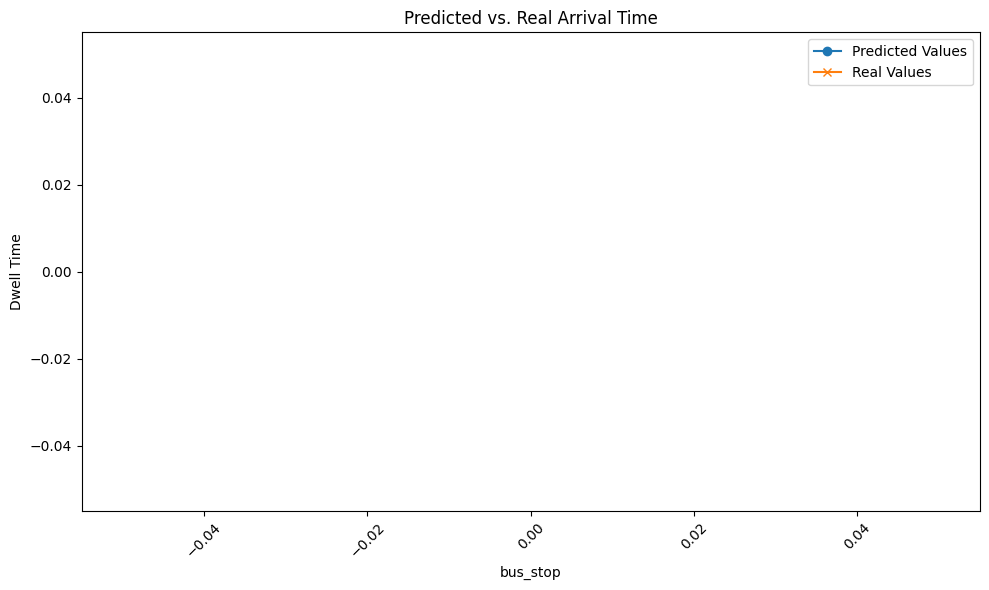

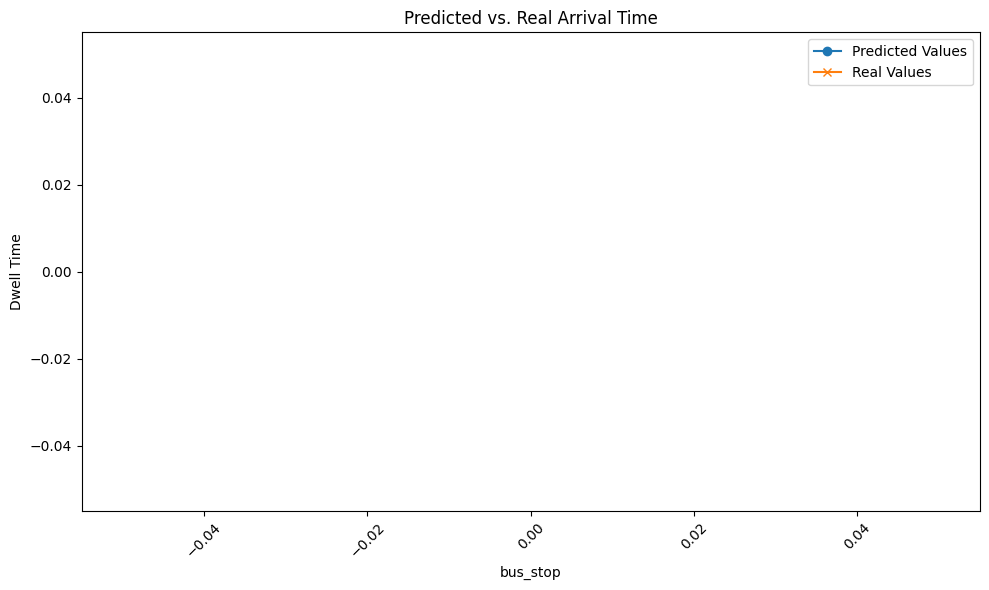

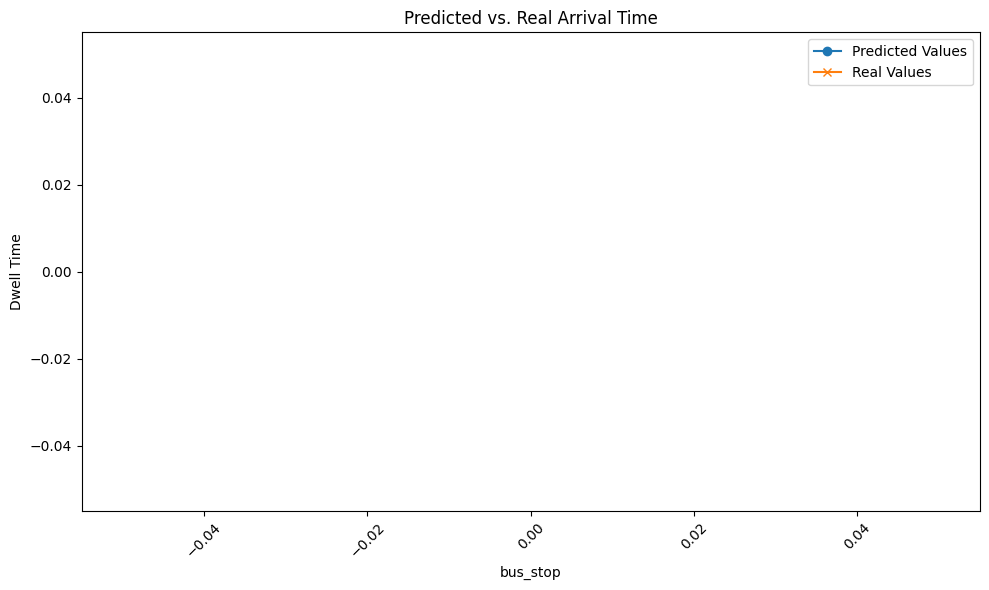

In [27]:

trip_id_list=[978,1355,1210]

for trips in trip_id_list:
    specific_busID_df = visualize_data[(visualize_data['trip_id'] == trips)]


    # Assuming you have arrays or Series for predicted values and real values
    predicted_values = specific_busID_df['predicted_dwell_time']  # Replace with your predicted values
    real_values = specific_busID_df['dwell_time_in_seconds']  # Replace with your real values

    plt.figure(figsize=(10, 6))
    plt.plot(specific_busID_df['bus_stop'].values, predicted_values.values, label='Predicted Values', marker='o')
    plt.plot(specific_busID_df['bus_stop'].values, real_values.values, label='Real Values', marker='x')
    plt.xlabel('bus_stop')
    plt.ylabel('Dwell Time')
    plt.title('Predicted vs. Real Arrival Time')
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


## Using XG boost with clusters

In [28]:
#add new feature

# Merge the dataframes using the device_id column
new_df = pd.merge(df, pivot_df, on='deviceid', how='inner')

In [29]:
new_df


,trip_id,deviceid,direction,bus_stop,day_of_week,time_of_day,Sunday/holiday,saturday,weekday/end,week_no,dt(w-1),dt(w-2),dt(w-3),dt(t-1),dt(t-2),dt(n-1),dt(n-2),dt(n-3),day,month,temp,precip,windspeed,conditions,rt(n-1),stop_type,dwell_time_in_seconds,year,arrival_hour,arrival_min,arrival_sec,Cluster_1.0,Cluster_3.0,Cluster_2.0,Cluster_0.0
0,4890.0,262,1,101,4,6.50,0,0,1,1,92.0,92.0,92.0,92.0,92.0,92.0,92.0,92.0,1,10,20.0,0.000,6.1,2,69.0,2,74.0,2021,6,40,58,30,42.0,21,7.0
1,4890.0,262,1,102,4,6.75,0,0,1,1,45.0,45.0,45.0,45.0,45.0,74.0,45.0,45.0,1,10,20.0,0.000,6.1,2,210.0,1,0.0,2021,6,45,42,30,42.0,21,7.0
2,4890.0,262,1,103,4,6.75,0,0,1,1,28.0,28.0,28.0,28.0,28.0,0.0,74.0,28.0,1,10,20.0,0.000,6.1,2,496.0,1,6.0,2021,6,53,58,30,42.0,21,7.0
3,4890.0,262,1,104,4,6.75,0,0,1,1,1.0,1.0,1.0,1.0,1.0,6.0,0.0,74.0,1,10,20.0,0.000,6.1,2,195.0,0,0.0,2021,6,57,19,30,42.0,21,7.0
4,4890.0,262,1,105,4,6.75,0,0,1,1,230.0,230.0,230.0,230.0,230.0,0.0,6.0,0.0,1,10,20.0,0.000,6.1,2,97.0,2,211.0,2021,6,58,56,30,42.0,21,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31066,4262.0,209,1,110,2,8.00,0,0,1,27,19.0,19.0,19.0,40.0,19.0,15.0,15.0,15.0,20,7,23.3,0.001,0.0,4,272.0,1,91.0,2022,8,12,44,50,0.0,50,0.0
31067,4262.0,209,1,111,2,8.25,0,0,1,27,12.0,12.0,12.0,15.0,12.0,91.0,15.0,15.0,20,7,23.3,0.001,0.0,4,210.0,0,15.0,2022,8,17,45,50,0.0,50,0.0
31068,4262.0,209,1,112,2,8.25,0,0,1,27,10.0,10.0,10.0,15.0,10.0,15.0,91.0,15.0,20,7,23.3,0.001,0.0,4,250.0,0,15.0,2022,8,22,10,50,0.0,50,0.0
31069,4262.0,209,1,113,2,8.25,0,0,1,27,16.0,16.0,16.0,63.0,16.0,15.0,15.0,91.0,20,7,23.3,0.001,0.0,4,179.0,1,15.0,2022,8,25,24,50,0.0,50,0.0


In [30]:
# get a list of week no in the new_df in acending order
week_no_list = new_df['week_no'].unique()
week_no_list.sort()
week_no_list

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37], dtype=int64)

In [31]:
# save the new_df to csv file
new_df.to_csv('../DataOut/df_for_dweltime.csv', index=False)

In [32]:
from sklearn.model_selection import train_test_split

# Define features and target
features1 = new_df.drop(['dwell_time_in_seconds'], axis=1)  # Drop the target feature
target1 = new_df['dwell_time_in_seconds']

# Filter data based on week_no condition
# test_data = new_df[new_df['week_no'].isin([39, 40, 41, 42])]
# train_data = new_df[~new_df['week_no'].isin([39, 40, 41, 42])]
test_data1 = new_df[new_df['week_no'].isin([34,35, 36, 37])]
train_data1 = new_df[~new_df['week_no'].isin([34,35, 36, 37])]

# Split train and test data into features and target
X_train1 = train_data1.drop(columns=['dwell_time_in_seconds']) 
y_train1 = train_data1['dwell_time_in_seconds']
X_test1 = test_data1.drop(columns=['dwell_time_in_seconds'])
y_test1 = test_data1['dwell_time_in_seconds']




In [33]:
# save as csv file 
new_df.to_csv('../DataOut/bus_trip_all_points_with_acceleration_and_radial_acceleration_and_distance.csv', index=False)

In [34]:
# Initialize XGBoost regressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import xgboost as xgb


model1 = xgb.XGBRegressor(colsample_bytree = 0.7, learning_rate = 0.1,max_depth = 6, alpha = 10, n_estimators = 1000)

# Train the model on the training data
model1.fit(X_train1, y_train1)

# Make predictions on the testing data
predictions1 = model1.predict(X_test1)

# Evaluate the model's performance
mae = mean_absolute_error(y_test1, predictions1)
rmse = np.sqrt(mean_squared_error(y_test1, predictions1))

print(f'Mean Absolute Error: {mae}')
print(f'Root Mean Square Error: {rmse}')


Mean Absolute Error: 17.136426556507306
Root Mean Square Error: 34.76221348125833


In [35]:
# export best xgboost model
import pickle
pickle.dump(model1, open('../DataOut/dweltime_model.sav', 'wb'))

In [36]:
# Mean Absolute Error: 16.902735837992143
# Root Mean Square Error: 34.478912624944435



In [37]:
test_data1

,trip_id,deviceid,direction,bus_stop,day_of_week,time_of_day,Sunday/holiday,saturday,weekday/end,week_no,dt(w-1),dt(w-2),dt(w-3),dt(t-1),dt(t-2),dt(n-1),dt(n-2),dt(n-3),day,month,temp,precip,windspeed,conditions,rt(n-1),stop_type,dwell_time_in_seconds,year,arrival_hour,arrival_min,arrival_sec,Cluster_1.0,Cluster_3.0,Cluster_2.0,Cluster_0.0
4987,5686.0,262,1,101,1,6.25,0,0,1,34,29.0,29.0,29.0,29.0,29.0,29.0,29.0,29.0,6,9,19.0,0.0,7.9,1,92.0,2,35.0,2022,6,22,28,30,42.0,21,7.0
4988,5686.0,262,1,102,1,6.25,0,0,1,34,17.0,17.0,17.0,17.0,17.0,35.0,17.0,17.0,6,9,19.0,0.0,7.9,1,222.0,1,15.0,2022,6,26,45,30,42.0,21,7.0
4989,5686.0,262,1,103,1,6.50,0,0,1,34,22.0,22.0,22.0,22.0,22.0,15.0,35.0,22.0,6,9,19.0,0.0,7.9,1,474.0,1,48.0,2022,6,34,54,30,42.0,21,7.0
4990,5686.0,262,1,104,1,6.50,0,0,1,34,5.0,5.0,5.0,5.0,5.0,48.0,15.0,35.0,6,9,19.0,0.0,7.9,1,173.0,0,0.0,2022,6,38,35,30,42.0,21,7.0
4991,5686.0,262,1,105,1,6.50,0,0,1,34,59.0,59.0,59.0,59.0,59.0,0.0,48.0,15.0,6,9,19.0,0.0,7.9,1,114.0,2,28.0,2022,6,40,29,30,42.0,21,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31011,2250.0,121,1,110,3,9.75,0,0,1,37,18.0,18.0,18.0,18.0,32.0,44.0,40.0,15.0,29,9,23.8,0.0,10.8,2,158.0,1,15.0,2022,9,52,51,26,10.0,38,26.0
31012,2250.0,121,1,111,3,9.75,0,0,1,37,10.0,12.0,15.0,10.0,22.0,15.0,44.0,40.0,29,9,23.8,0.0,10.8,2,208.0,0,15.0,2022,9,56,34,26,10.0,38,26.0
31013,2250.0,121,1,112,3,9.75,0,0,1,37,0.0,9.0,13.0,12.0,15.0,15.0,15.0,44.0,29,9,23.8,0.0,10.8,2,186.0,0,13.0,2022,9,59,55,26,10.0,38,26.0
31014,2250.0,121,1,113,3,10.00,0,0,1,37,15.0,15.0,15.0,15.0,23.0,13.0,15.0,15.0,29,9,26.0,0.0,12.2,2,118.0,1,9.0,2022,10,2,6,26,10.0,38,26.0


In [38]:
#print each unique trip_id
test_data1['trip_id'].unique()

array([5686., 5688., 5690., 5692., 5694., 5696., 5698., 5700., 5702.,
       5703., 5705., 5707., 5709., 5711., 5713., 5715., 5717., 5719.,
       5721., 5723., 5725., 5727., 5729., 5731., 5732., 5734., 5736.,
       5738., 5740., 5742., 5744., 5746., 5748., 5750., 5752., 5754.,
       5756., 5758., 5760., 5762., 5764., 5766., 5768., 5770., 5772.,
       5774., 5776., 5778., 5780., 5782., 5784., 5786., 5788., 3222.,
       3224., 3226., 3228., 3230., 3232., 3234., 3236., 3238., 3240.,
       3242., 3244., 3247., 3249., 3251., 3253., 3255., 3257., 3259.,
       3261., 3263., 3265., 3267., 3269., 3271., 3275., 3277., 3281.,
       3283., 3285., 3287., 3289., 3291., 3293., 3295., 3297., 3299.,
       3301., 3303., 3305., 3307., 3309., 3313., 3315., 3317., 3319.,
       3321., 3323., 3325., 3327., 3329., 3331., 3333., 3335.,  747.,
        749.,  753.,  755.,  757.,  759.,  761.,  763.,  765.,  767.,
        769.,  771.,  773.,  775.,  777.,  779.,  783.,  785.,  787.,
        789.,  791.,

In [39]:
import matplotlib.pyplot as plt

# take a copy of test_data dataframe
visualize_data1 = test_data1.copy()
visualize_data1['predicted_dwell_time'] = predictions1




# Construct a custom datetime format based on your column order
datetime_format = "%Y %m %d %H %M %S"

# Convert the columns to a single combined datetime column
visualize_data1['combined_datetime'] = pd.to_datetime(
    visualize_data1[['year', 'month', 'day', 'arrival_hour', 'arrival_min', 'arrival_sec']]
    .astype(str)
    .apply(' '.join, axis=1),
    format=datetime_format
)


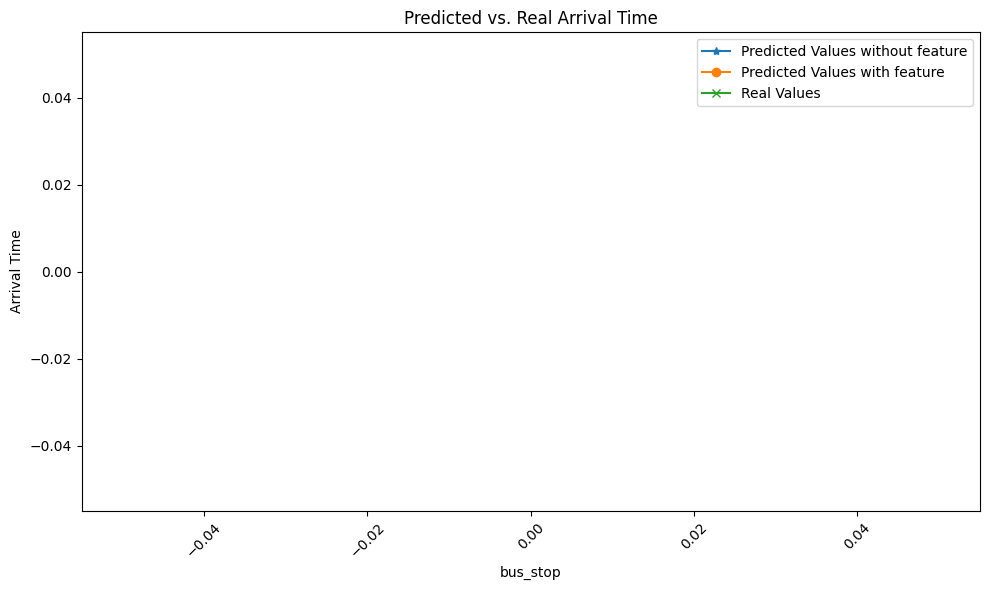

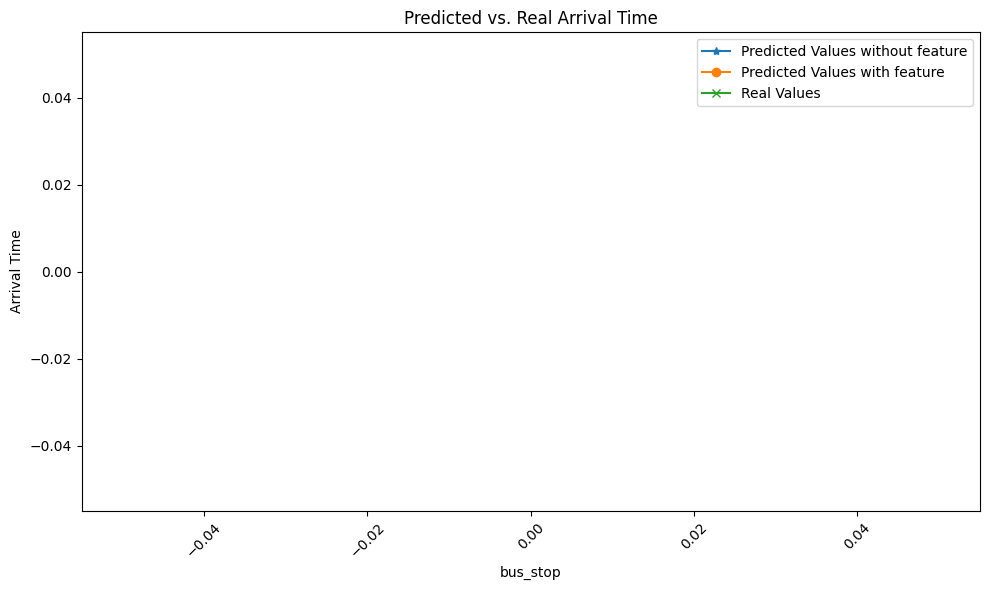

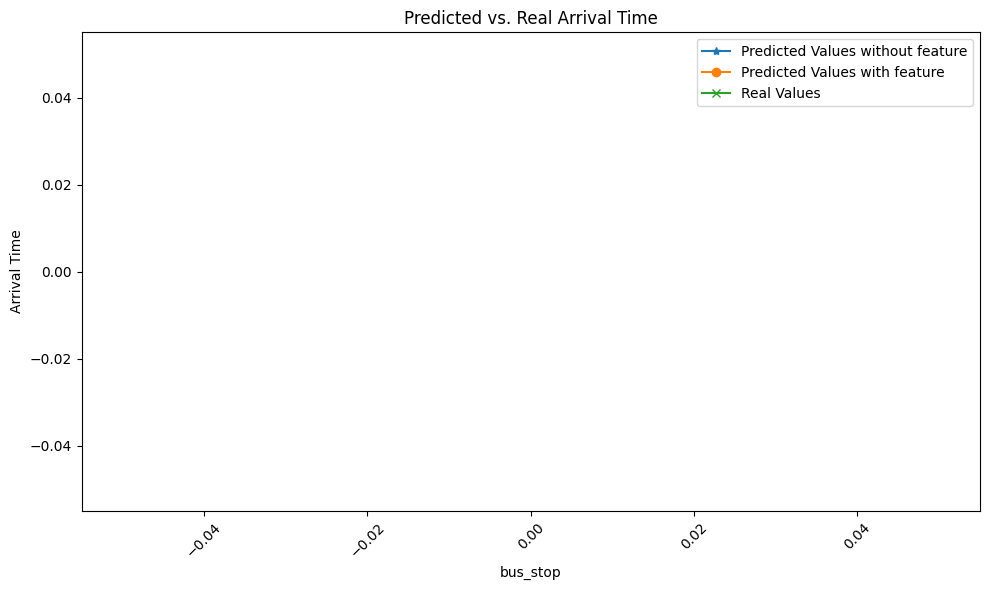

In [40]:
trip_id_list=[978,1355,1210]

for trips in trip_id_list:
    specific_busID_df = visualize_data1[(visualize_data1['trip_id'] == trips)]


    # Assuming you have arrays or Series for predicted values and real values
    predicted_values1 = specific_busID_df['predicted_dwell_time']  # Replace with your predicted values
    real_values1 = specific_busID_df['dwell_time_in_seconds']  # Replace with your real values

    plt.figure(figsize=(10, 6))
    plt.plot(specific_busID_df['bus_stop'].values, predicted_values.values, label='Predicted Values without feature', marker='*')
    plt.plot(specific_busID_df['bus_stop'].values, predicted_values1.values, label='Predicted Values with feature', marker='o')
    plt.plot(specific_busID_df['bus_stop'].values, real_values1.values, label='Real Values', marker='x')
    plt.xlabel('bus_stop')
    plt.ylabel('Arrival Time')
    plt.title('Predicted vs. Real Arrival Time')
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


In [41]:
predicted_values1 = pd.DataFrame(predicted_values1)
predicted_values1

,predicted_dwell_time


In [42]:
visualize_data1

,trip_id,deviceid,direction,bus_stop,day_of_week,time_of_day,Sunday/holiday,saturday,weekday/end,week_no,dt(w-1),dt(w-2),dt(w-3),dt(t-1),dt(t-2),dt(n-1),dt(n-2),dt(n-3),day,month,temp,precip,windspeed,conditions,rt(n-1),stop_type,dwell_time_in_seconds,year,arrival_hour,arrival_min,arrival_sec,Cluster_1.0,Cluster_3.0,Cluster_2.0,Cluster_0.0,predicted_dwell_time,combined_datetime
4987,5686.0,262,1,101,1,6.25,0,0,1,34,29.0,29.0,29.0,29.0,29.0,29.0,29.0,29.0,6,9,19.0,0.0,7.9,1,92.0,2,35.0,2022,6,22,28,30,42.0,21,7.0,53.446701,2022-09-06 06:22:28
4988,5686.0,262,1,102,1,6.25,0,0,1,34,17.0,17.0,17.0,17.0,17.0,35.0,17.0,17.0,6,9,19.0,0.0,7.9,1,222.0,1,15.0,2022,6,26,45,30,42.0,21,7.0,22.469559,2022-09-06 06:26:45
4989,5686.0,262,1,103,1,6.50,0,0,1,34,22.0,22.0,22.0,22.0,22.0,15.0,35.0,22.0,6,9,19.0,0.0,7.9,1,474.0,1,48.0,2022,6,34,54,30,42.0,21,7.0,9.322918,2022-09-06 06:34:54
4990,5686.0,262,1,104,1,6.50,0,0,1,34,5.0,5.0,5.0,5.0,5.0,48.0,15.0,35.0,6,9,19.0,0.0,7.9,1,173.0,0,0.0,2022,6,38,35,30,42.0,21,7.0,5.810030,2022-09-06 06:38:35
4991,5686.0,262,1,105,1,6.50,0,0,1,34,59.0,59.0,59.0,59.0,59.0,0.0,48.0,15.0,6,9,19.0,0.0,7.9,1,114.0,2,28.0,2022,6,40,29,30,42.0,21,7.0,65.389122,2022-09-06 06:40:29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31011,2250.0,121,1,110,3,9.75,0,0,1,37,18.0,18.0,18.0,18.0,32.0,44.0,40.0,15.0,29,9,23.8,0.0,10.8,2,158.0,1,15.0,2022,9,52,51,26,10.0,38,26.0,14.262445,2022-09-29 09:52:51
31012,2250.0,121,1,111,3,9.75,0,0,1,37,10.0,12.0,15.0,10.0,22.0,15.0,44.0,40.0,29,9,23.8,0.0,10.8,2,208.0,0,15.0,2022,9,56,34,26,10.0,38,26.0,18.372601,2022-09-29 09:56:34
31013,2250.0,121,1,112,3,9.75,0,0,1,37,0.0,9.0,13.0,12.0,15.0,15.0,15.0,44.0,29,9,23.8,0.0,10.8,2,186.0,0,13.0,2022,9,59,55,26,10.0,38,26.0,15.165767,2022-09-29 09:59:55
31014,2250.0,121,1,113,3,10.00,0,0,1,37,15.0,15.0,15.0,15.0,23.0,13.0,15.0,15.0,29,9,26.0,0.0,12.2,2,118.0,1,9.0,2022,10,2,6,26,10.0,38,26.0,5.778873,2022-09-29 10:02:06


In [43]:
visualize_data1.to_csv('../DataOut/dwelltime_with_predictions.csv', index=False)

## Using XG boost with clusters + features


In [44]:
#add new feature

# Merge the dataframes using the device_id column
new_df2 = pd.merge(df, pivot_df, on='deviceid', how='inner')

In [45]:
new_df2=df


In [46]:
# get a list of week no in the new_df in acending order
week_no_list = new_df2['week_no'].unique()
week_no_list.sort()
week_no_list

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37], dtype=int64)

In [47]:
# save the new_df2 to csv file
new_df2.to_csv('../DataOut/df_for_dweltime.csv', index=False)

In [48]:
# open csv ../DataOut/avg_for_devID_time_of_day_and_bus_stop.csv
avg_for_devID_time_of_day_and_bus_stop = pd.read_csv('../DataOut/avg_for_devID_time_of_day_and_bus_stop.csv')

In [49]:
# rename avg_for_devID_time_of_day_and_segment time_of_day column to dayparts
avg_for_devID_time_of_day_and_bus_stop.rename(columns={'time_of_day': 'dayparts'}, inplace=True)

In [50]:
# Create a new 'time_of_day' column based on the time component
new_df2['dayparts'] = pd.cut(
    new_df2['arrival_hour'],
    bins=[0, 6, 19, 24],
    labels=['morning', 'day', 'night'],
    include_lowest=True
)

In [51]:
# print the data types of ['deviceid', 'dayparts','bus_stop'] columns in new_df2 
print(new_df2[['deviceid', 'dayparts','bus_stop']].dtypes)
print(avg_for_devID_time_of_day_and_bus_stop[['deviceid', 'dayparts','bus_stop']].dtypes)

deviceid       int64
dayparts    category
bus_stop       int64
dtype: object
deviceid     int64
dayparts    object
bus_stop    object
dtype: object


In [53]:
# drop rows where bus_stop is 'BT02' or 'BT01' from avg_for_devID_time_of_day_and_bus_stop
avg_for_devID_time_of_day_and_bus_stop = avg_for_devID_time_of_day_and_bus_stop[~avg_for_devID_time_of_day_and_bus_stop['bus_stop'].isin(['BT02','BT01'])]
# Convert 'dayparts' and 'bus_stop' columns to the appropriate data types
avg_for_devID_time_of_day_and_bus_stop['dayparts'] = avg_for_devID_time_of_day_and_bus_stop['dayparts'].astype('category')
avg_for_devID_time_of_day_and_bus_stop['bus_stop'] = avg_for_devID_time_of_day_and_bus_stop['bus_stop'].astype(int)

# Now, attempt the merge
daf_with_features = pd.merge(new_df2, avg_for_devID_time_of_day_and_bus_stop, on=['deviceid', 'dayparts','bus_stop'], how='left')


In [54]:
# Create a custom mapping dictionary
dayparts_mapping = {'morning': 0, 'day': 1, 'night': 2}

# Use the map function to label encode 'dayparts' column
daf_with_features['dayparts'] = daf_with_features['dayparts'].map(dayparts_mapping)

In [55]:
print(daf_with_features.dtypes)

trip_id                  float64
deviceid                   int64
direction                  int64
bus_stop                   int64
day_of_week                int64
time_of_day              float64
Sunday/holiday             int64
saturday                   int64
weekday/end                int64
week_no                    int64
dt(w-1)                  float64
dt(w-2)                  float64
dt(w-3)                  float64
dt(t-1)                  float64
dt(t-2)                  float64
dt(n-1)                  float64
dt(n-2)                  float64
dt(n-3)                  float64
day                        int32
month                      int32
temp                     float64
precip                   float64
windspeed                float64
conditions                 int32
rt(n-1)                  float64
stop_type                  int32
dwell_time_in_seconds    float64
year                       int32
arrival_hour               int32
arrival_min                int32
arrival_se

In [56]:
daf_with_features

,trip_id,deviceid,direction,bus_stop,day_of_week,time_of_day,Sunday/holiday,saturday,weekday/end,week_no,dt(w-1),dt(w-2),dt(w-3),dt(t-1),dt(t-2),dt(n-1),dt(n-2),dt(n-3),day,month,temp,precip,windspeed,conditions,rt(n-1),stop_type,dwell_time_in_seconds,year,arrival_hour,arrival_min,arrival_sec,dayparts,starting_speed,ending_speed,average_speed,starting_acceleration,ending_acceleration,average_acceleration,time_to_slow_down,time_to_speed_up,time_stay_stop
0,4890.0,262,1,101,4,6.50,0,0,1,1,92.0,92.0,92.0,92.0,92.0,92.0,92.0,92.0,1,10,20.0,0.0,6.1,2,69.0,2,74.0,2021,6,40,58,0,9.899213,8.279327,5.318573,0.023998,0.323973,-0.454076,15.666667,72.666667,0.000000
1,4890.0,262,1,102,4,6.75,0,0,1,1,45.0,45.0,45.0,45.0,45.0,74.0,45.0,45.0,1,10,20.0,0.0,6.1,2,210.0,1,0.0,2021,6,45,42,0,9.719227,9.179267,8.804304,-0.119990,0.485960,-0.041206,20.333333,12.666667,14.000000
2,4890.0,262,1,103,4,6.75,0,0,1,1,28.0,28.0,28.0,28.0,28.0,0.0,74.0,28.0,1,10,20.0,0.0,6.1,2,496.0,1,6.0,2021,6,53,58,0,19.258467,9.359253,10.769143,0.215984,0.581953,-0.406059,9.000000,3.666667,5.000000
3,4890.0,262,1,104,4,6.75,0,0,1,1,1.0,1.0,1.0,1.0,1.0,6.0,0.0,74.0,1,10,20.0,0.0,6.1,2,195.0,0,0.0,2021,6,57,19,0,16.918667,16.378700,16.648683,0.719944,0.287976,0.503960,0.000000,0.000000,10.000000
4,4890.0,262,1,105,4,6.75,0,0,1,1,230.0,230.0,230.0,230.0,230.0,0.0,6.0,0.0,1,10,20.0,0.0,6.1,2,97.0,2,211.0,2021,6,58,56,0,8.639303,12.778977,6.119508,-0.963195,0.647948,-0.721600,3.666667,197.333333,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31066,3335.0,123,1,110,4,16.00,0,0,1,37,30.0,15.0,35.0,15.0,15.0,38.0,13.0,7.0,30,9,25.7,0.0,17.3,1,138.0,1,15.0,2022,16,14,20,1,9.604692,12.221409,6.466691,-0.139076,0.659619,-0.296156,6.636364,33.897436,9.363636
31067,3335.0,123,1,111,4,16.25,0,0,1,37,12.0,9.0,14.0,12.0,7.0,15.0,38.0,13.0,30,9,25.7,0.0,17.3,1,303.0,0,0.0,2022,16,19,38,1,15.005843,11.205043,8.823302,-0.298009,0.657396,-0.731495,5.457471,20.659770,5.377011
31068,3335.0,123,1,112,4,16.25,0,0,1,37,15.0,23.0,20.0,20.0,15.0,0.0,15.0,38.0,30,9,25.7,0.0,17.3,1,195.0,0,15.0,2022,16,22,53,1,16.910648,8.691160,9.273840,0.069656,0.515499,-0.678976,5.533958,11.447307,5.843091
31069,3335.0,123,1,113,4,16.25,0,0,1,37,30.0,15.0,35.0,60.0,96.0,15.0,0.0,15.0,30,9,25.7,0.0,17.3,1,134.0,1,15.0,2022,16,25,22,1,15.696782,9.602617,7.743070,-0.255663,0.557733,-0.804748,6.694836,52.103286,13.166667


In [57]:
from sklearn.model_selection import train_test_split

# Define features and target
features1 = daf_with_features.drop(['dwell_time_in_seconds'], axis=1)  # Drop the target feature
target1 = daf_with_features['dwell_time_in_seconds']

# Filter data based on week_no condition
# test_data = new_df[new_df['week_no'].isin([39, 40, 41, 42])]
# train_data = new_df[~new_df['week_no'].isin([39, 40, 41, 42])]
test_data1 = daf_with_features[daf_with_features['week_no'].isin([34,35, 36, 37])]
train_data1 = daf_with_features[~daf_with_features['week_no'].isin([34,35, 36, 37])]

# Split train and test data into features and target
X_train1 = train_data1.drop(columns=['dwell_time_in_seconds']) 
y_train1 = train_data1['dwell_time_in_seconds']
X_test1 = test_data1.drop(columns=['dwell_time_in_seconds'])
y_test1 = test_data1['dwell_time_in_seconds']

In [58]:
# Initialize XGBoost regressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import xgboost as xgb


model1 = xgb.XGBRegressor(colsample_bytree = 0.7, learning_rate = 0.1,max_depth = 6, alpha = 10, n_estimators = 1000)

# Train the model on the training data
model1.fit(X_train1, y_train1)

# Make predictions on the testing data
predictions1 = model1.predict(X_test1)

# Evaluate the model's performance
mae = mean_absolute_error(y_test1, predictions1)
rmse = np.sqrt(mean_squared_error(y_test1, predictions1))

print(f'Mean Absolute Error: {mae}')
print(f'Root Mean Square Error: {rmse}')


Mean Absolute Error: 17.229885976322475
Root Mean Square Error: 35.340944206548826


In [59]:
# export best xgboost model
import pickle
pickle.dump(model1, open('../DataOut/dweltime_model.sav', 'wb'))

In [60]:
# Mean Absolute Error: 16.902735837992143
# Root Mean Square Error: 34.478912624944435

# Mean Absolute Error: 17.136426556507306
# Root Mean Square Error: 34.76221348125833



In [61]:
test_data1

,trip_id,deviceid,direction,bus_stop,day_of_week,time_of_day,Sunday/holiday,saturday,weekday/end,week_no,dt(w-1),dt(w-2),dt(w-3),dt(t-1),dt(t-2),dt(n-1),dt(n-2),dt(n-3),day,month,temp,precip,windspeed,conditions,rt(n-1),stop_type,dwell_time_in_seconds,year,arrival_hour,arrival_min,arrival_sec,dayparts,starting_speed,ending_speed,average_speed,starting_acceleration,ending_acceleration,average_acceleration,time_to_slow_down,time_to_speed_up,time_stay_stop
27406,3222.0,123,1,101,0,7.00,0,0,1,34,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,5,9,19.9,0.0,4.7,2,92.0,2,15.0,2022,7,12,41,1,9.053526,5.063021,4.366350,0.121580,0.232660,-0.251850,15.566210,63.687215,23.294521
27407,3222.0,123,1,102,0,7.25,0,0,1,34,37.0,45.0,45.0,45.0,45.0,15.0,45.0,45.0,5,9,19.9,0.0,4.7,2,272.0,1,15.0,2022,7,17,28,1,8.827497,10.422770,7.803779,-0.029234,0.343318,-0.049632,22.649203,19.567198,16.938497
27408,3222.0,123,1,103,0,7.25,0,0,1,34,23.0,23.0,23.0,23.0,23.0,15.0,15.0,23.0,5,9,19.9,0.0,4.7,2,623.0,1,70.0,2022,7,28,6,1,11.737027,8.893987,7.056416,-0.083354,0.595451,-0.313565,10.004535,15.603175,7.444444
27409,3222.0,123,1,104,0,7.50,0,0,1,34,0.0,2.0,2.0,2.0,2.0,70.0,15.0,15.0,5,9,19.9,0.0,4.7,2,183.0,0,0.0,2022,7,32,19,1,15.120031,12.294503,12.766721,0.403181,0.305319,0.156651,3.803653,2.867580,8.262557
27410,3222.0,123,1,105,0,7.50,0,0,1,34,15.0,43.0,43.0,43.0,43.0,0.0,70.0,15.0,5,9,19.9,0.0,4.7,2,113.0,2,28.0,2022,7,34,12,1,13.111488,10.117738,6.525318,-0.354900,0.523231,-0.667406,6.193622,118.974943,32.717540
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31066,3335.0,123,1,110,4,16.00,0,0,1,37,30.0,15.0,35.0,15.0,15.0,38.0,13.0,7.0,30,9,25.7,0.0,17.3,1,138.0,1,15.0,2022,16,14,20,1,9.604692,12.221409,6.466691,-0.139076,0.659619,-0.296156,6.636364,33.897436,9.363636
31067,3335.0,123,1,111,4,16.25,0,0,1,37,12.0,9.0,14.0,12.0,7.0,15.0,38.0,13.0,30,9,25.7,0.0,17.3,1,303.0,0,0.0,2022,16,19,38,1,15.005843,11.205043,8.823302,-0.298009,0.657396,-0.731495,5.457471,20.659770,5.377011
31068,3335.0,123,1,112,4,16.25,0,0,1,37,15.0,23.0,20.0,20.0,15.0,0.0,15.0,38.0,30,9,25.7,0.0,17.3,1,195.0,0,15.0,2022,16,22,53,1,16.910648,8.691160,9.273840,0.069656,0.515499,-0.678976,5.533958,11.447307,5.843091
31069,3335.0,123,1,113,4,16.25,0,0,1,37,30.0,15.0,35.0,60.0,96.0,15.0,0.0,15.0,30,9,25.7,0.0,17.3,1,134.0,1,15.0,2022,16,25,22,1,15.696782,9.602617,7.743070,-0.255663,0.557733,-0.804748,6.694836,52.103286,13.166667


In [62]:
#print each unique trip_id
test_data1['trip_id'].unique()

array([3222., 4725., 3224., 4727., 3226., 5686., 1414., 4728., 2152.,
        747., 5688., 1416., 4730., 2154.,  749., 5690., 4732., 5692.,
       3228., 2159.,  753., 5694., 3230., 2161.,  755., 5696., 3232.,
       2164.,  757., 3234., 1419.,  759., 3236.,  761., 1421., 5698.,
       2167.,  763., 4734., 3238., 1423., 5700., 2169.,  765., 4736.,
       3240., 5702., 4738., 3242., 3244., 1425., 5703.,  767., 1427.,
       5705., 2173.,  769., 5707., 2175.,  771., 5709., 2177.,  773.,
       5711., 2179., 3247.,  775., 1429., 5713., 2181.,  777., 4744.,
       3249., 1431., 5715., 2183.,  779., 4746., 3251., 5717., 2185.,
       5719., 2187.,  783., 4750., 3253., 5721., 2189.,  785., 4752.,
       3255., 5723., 2191., 4754., 3257., 1433., 4756., 3259., 1435.,
       4758., 3261., 1437., 4760., 3263., 1439., 5725., 2193., 4762.,
       1441., 5727., 2195., 4764., 1443., 5729., 2197., 4766., 5731.,
       5732.,  787., 3265., 2199., 5734.,  789., 3267., 2201., 5736.,
       1445., 5738.,

In [63]:
import matplotlib.pyplot as plt

# take a copy of test_data dataframe
visualize_data1 = test_data1.copy()
visualize_data1['predicted_dwell_time'] = predictions1




# Construct a custom datetime format based on your column order
datetime_format = "%Y %m %d %H %M %S"

# Convert the columns to a single combined datetime column
visualize_data1['combined_datetime'] = pd.to_datetime(
    visualize_data1[['year', 'month', 'day', 'arrival_hour', 'arrival_min', 'arrival_sec']]
    .astype(str)
    .apply(' '.join, axis=1),
    format=datetime_format
)


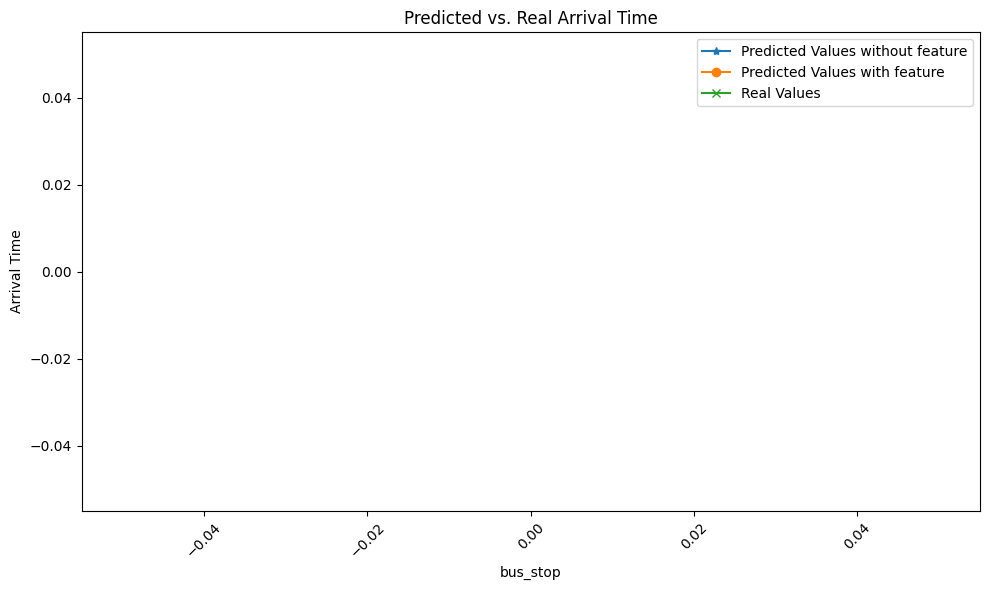

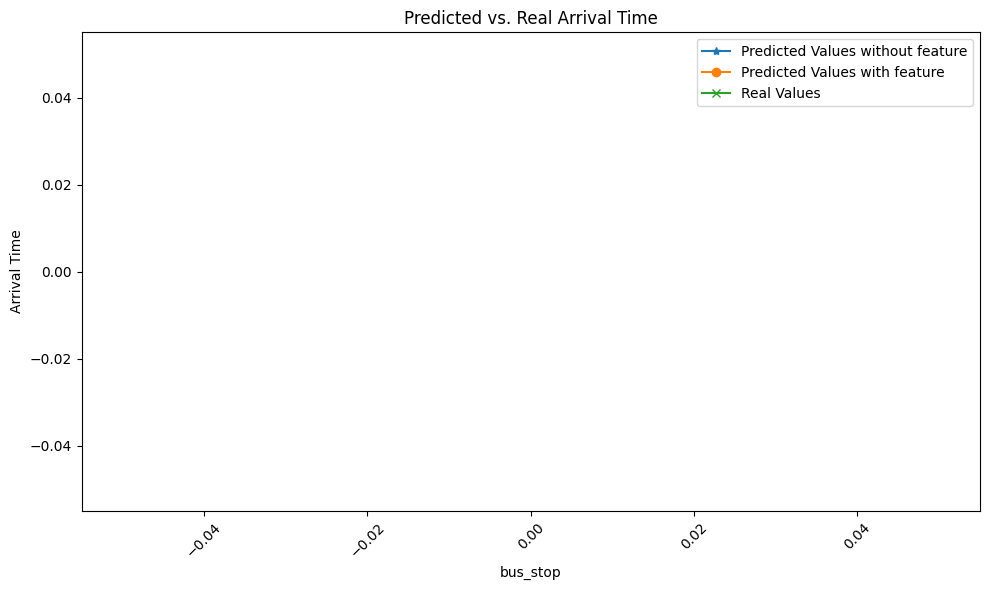

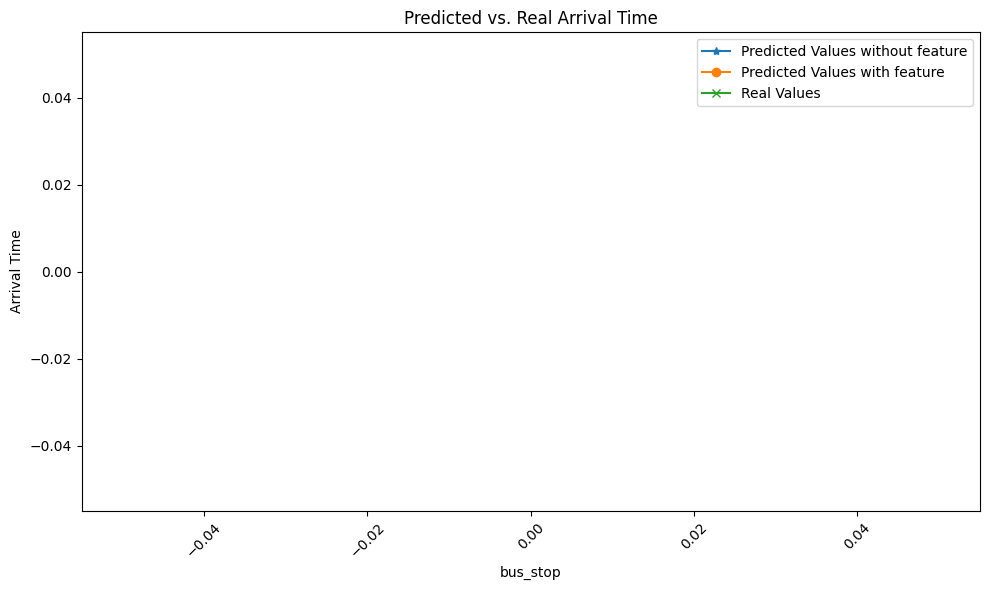

In [64]:
trip_id_list=[978,1355,1210]

for trips in trip_id_list:
    specific_busID_df = visualize_data1[(visualize_data1['trip_id'] == trips)]


    # Assuming you have arrays or Series for predicted values and real values
    predicted_values1 = specific_busID_df['predicted_dwell_time']  # Replace with your predicted values
    real_values1 = specific_busID_df['dwell_time_in_seconds']  # Replace with your real values

    plt.figure(figsize=(10, 6))
    plt.plot(specific_busID_df['bus_stop'].values, predicted_values.values, label='Predicted Values without feature', marker='*')
    plt.plot(specific_busID_df['bus_stop'].values, predicted_values1.values, label='Predicted Values with feature', marker='o')
    plt.plot(specific_busID_df['bus_stop'].values, real_values1.values, label='Real Values', marker='x')
    plt.xlabel('bus_stop')
    plt.ylabel('Arrival Time')
    plt.title('Predicted vs. Real Arrival Time')
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


In [65]:
predicted_values1 = pd.DataFrame(predicted_values1)
predicted_values1

,predicted_dwell_time


In [66]:
visualize_data1

,trip_id,deviceid,direction,bus_stop,day_of_week,time_of_day,Sunday/holiday,saturday,weekday/end,week_no,dt(w-1),dt(w-2),dt(w-3),dt(t-1),dt(t-2),dt(n-1),dt(n-2),dt(n-3),day,month,temp,precip,windspeed,conditions,rt(n-1),stop_type,dwell_time_in_seconds,year,arrival_hour,arrival_min,arrival_sec,dayparts,starting_speed,ending_speed,average_speed,starting_acceleration,ending_acceleration,average_acceleration,time_to_slow_down,time_to_speed_up,time_stay_stop,predicted_dwell_time,combined_datetime
27406,3222.0,123,1,101,0,7.00,0,0,1,34,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,5,9,19.9,0.0,4.7,2,92.0,2,15.0,2022,7,12,41,1,9.053526,5.063021,4.366350,0.121580,0.232660,-0.251850,15.566210,63.687215,23.294521,37.344280,2022-09-05 07:12:41
27407,3222.0,123,1,102,0,7.25,0,0,1,34,37.0,45.0,45.0,45.0,45.0,15.0,45.0,45.0,5,9,19.9,0.0,4.7,2,272.0,1,15.0,2022,7,17,28,1,8.827497,10.422770,7.803779,-0.029234,0.343318,-0.049632,22.649203,19.567198,16.938497,34.078457,2022-09-05 07:17:28
27408,3222.0,123,1,103,0,7.25,0,0,1,34,23.0,23.0,23.0,23.0,23.0,15.0,15.0,23.0,5,9,19.9,0.0,4.7,2,623.0,1,70.0,2022,7,28,6,1,11.737027,8.893987,7.056416,-0.083354,0.595451,-0.313565,10.004535,15.603175,7.444444,38.512798,2022-09-05 07:28:06
27409,3222.0,123,1,104,0,7.50,0,0,1,34,0.0,2.0,2.0,2.0,2.0,70.0,15.0,15.0,5,9,19.9,0.0,4.7,2,183.0,0,0.0,2022,7,32,19,1,15.120031,12.294503,12.766721,0.403181,0.305319,0.156651,3.803653,2.867580,8.262557,-1.170019,2022-09-05 07:32:19
27410,3222.0,123,1,105,0,7.50,0,0,1,34,15.0,43.0,43.0,43.0,43.0,0.0,70.0,15.0,5,9,19.9,0.0,4.7,2,113.0,2,28.0,2022,7,34,12,1,13.111488,10.117738,6.525318,-0.354900,0.523231,-0.667406,6.193622,118.974943,32.717540,37.408016,2022-09-05 07:34:12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31066,3335.0,123,1,110,4,16.00,0,0,1,37,30.0,15.0,35.0,15.0,15.0,38.0,13.0,7.0,30,9,25.7,0.0,17.3,1,138.0,1,15.0,2022,16,14,20,1,9.604692,12.221409,6.466691,-0.139076,0.659619,-0.296156,6.636364,33.897436,9.363636,13.259806,2022-09-30 16:14:20
31067,3335.0,123,1,111,4,16.25,0,0,1,37,12.0,9.0,14.0,12.0,7.0,15.0,38.0,13.0,30,9,25.7,0.0,17.3,1,303.0,0,0.0,2022,16,19,38,1,15.005843,11.205043,8.823302,-0.298009,0.657396,-0.731495,5.457471,20.659770,5.377011,14.614706,2022-09-30 16:19:38
31068,3335.0,123,1,112,4,16.25,0,0,1,37,15.0,23.0,20.0,20.0,15.0,0.0,15.0,38.0,30,9,25.7,0.0,17.3,1,195.0,0,15.0,2022,16,22,53,1,16.910648,8.691160,9.273840,0.069656,0.515499,-0.678976,5.533958,11.447307,5.843091,18.089554,2022-09-30 16:22:53
31069,3335.0,123,1,113,4,16.25,0,0,1,37,30.0,15.0,35.0,60.0,96.0,15.0,0.0,15.0,30,9,25.7,0.0,17.3,1,134.0,1,15.0,2022,16,25,22,1,15.696782,9.602617,7.743070,-0.255663,0.557733,-0.804748,6.694836,52.103286,13.166667,95.562569,2022-09-30 16:25:22


In [67]:
visualize_data1.to_csv('../DataOut/dwelltime_with_predictions.csv', index=False)